# Ford GoBike System Data Exploration

## by Thomas Tran

## Preliminary Wrangling

This [data set](https://www.fordgobike.com/system-data) includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In this project, we will focus on the record of individual trips taken in from 2017 to February, 2019.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from functools import reduce
from os import listdir
import datetime
import math

%matplotlib inline

In [39]:
#Merge all files to a file for exploration.
folder_data = 'Ford_Gobike_Data'
list_data = []
for files in listdir(folder_data):
    list_data.append(pd.read_csv(folder_data + '/' + files))
df = pd.concat(list_data)
df.to_csv('data_gobike.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df = pd.read_csv('data_gobike.csv')
df.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758915 entries, 0 to 2758914
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    float64
bike_share_for_all_trip    object
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(10), int64(1), object(7)
memory usage: 378.9+ MB


We can see there are other places and we just focus in San Francisco Bay to analyze.

In [4]:
# Set the max and min of latitude and longitude of San Francisco Bay
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [5]:
end_station_latitude_mask = (df['end_station_latitude']>=min_latitude_sf) & (df['end_station_latitude']<=max_latitude_sf)
start_station_latitude_mask = (df['start_station_latitude']>=min_latitude_sf) & (df['start_station_latitude']<=max_latitude_sf)

In [6]:
end_station_longitude_mask =(df['end_station_longitude']>=min_longitude_sf) & (df['end_station_longitude']<=max_longitude_sf)
start_station_longitude_mask = (df['start_station_longitude']>=min_longitude_sf) & (df['start_station_longitude']<=max_longitude_sf)

In [7]:
df = df[end_station_latitude_mask & start_station_latitude_mask & end_station_longitude_mask & start_station_longitude_mask]

In [8]:
#Create new column for the age of members
df['users_age'] = 2019 - df['member_birth_year']

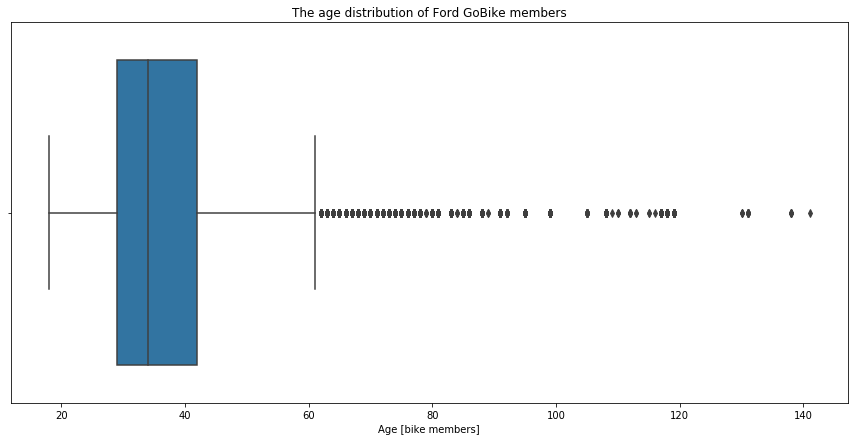

In [9]:
plt.figure(figsize = [15,7])
sb.boxplot(data = df, x = 'users_age')
plt.title("The age distribution of Ford GoBike members")
plt.xlabel("Age [bike members]");

Based on the above plot, most of members are less than 60 years old. For a better analyze, we just focus on the popular members who are under 60 years old.

In [10]:
df = df[df['users_age'] <=60]
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'], 1)

In [11]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1844898, 17)
bike_id                    float64
bike_share_for_all_trip     object
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
users_age                  float64
dtype: object
    bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0    1035.0                      No         598.0           114.0   
1    1673.0                      No         943.0           324.0   
2    3498.0                      No       18587.0            15.0   
3    3129.0                      No       18558.0            15.0   
17   2011.0                     

In [12]:
# descriptive statistics for numeric variables
print(df.describe())

            bike_id  duration_sec  end_station_id  end_station_latitude  \
count  1.844898e+06  1.844898e+06    1.844898e+06          1.844898e+06   
mean   2.563635e+03  7.922621e+02    8.000519e+01          3.777828e+01   
std    1.512454e+03  1.961437e+03    8.324551e+01          1.261064e-02   
min    1.100000e+01  6.100000e+01    3.000000e+00          3.772925e+01   
25%    1.390000e+03  3.690000e+02    2.200000e+01          3.777041e+01   
50%    2.536000e+03  5.700000e+02    6.100000e+01          3.777664e+01   
75%    3.617000e+03  8.600000e+02    1.000000e+02          3.778806e+01   
max    6.644000e+03  8.628100e+04    3.980000e+02          3.780477e+01   

       end_station_longitude  member_birth_year  start_station_id  \
count           1.844898e+06       1.844898e+06      1.844898e+06   
mean           -1.224060e+02       1.983109e+03      8.243060e+01   
std             1.268007e-02       9.050389e+00      8.447124e+01   
min            -1.224737e+02       1.959000e+03 

### What is the structure of your dataset?

> There are 1,844,898 records in the dataset with 17 features (bike_id, bike_share_for_all_trip, duration_sec, end_station_id, end_station_latitude, end_station_longitude, end_station_name, end_time, member_birth_year, member_gender, start_station_id, start_station_latitude, start_station_longitude, start_station_name, start_time, user_type, users_age). Most variables are numeric.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out:
what ages or genders have longer duration in the dataset?
When are most trips taken in terms of time of day, day of the week?
How long does the average trip take?
Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that genders and group of ages will affect the results of the duration or distance.

## Univariate Exploration

First of all, I will check the distribution of durations.

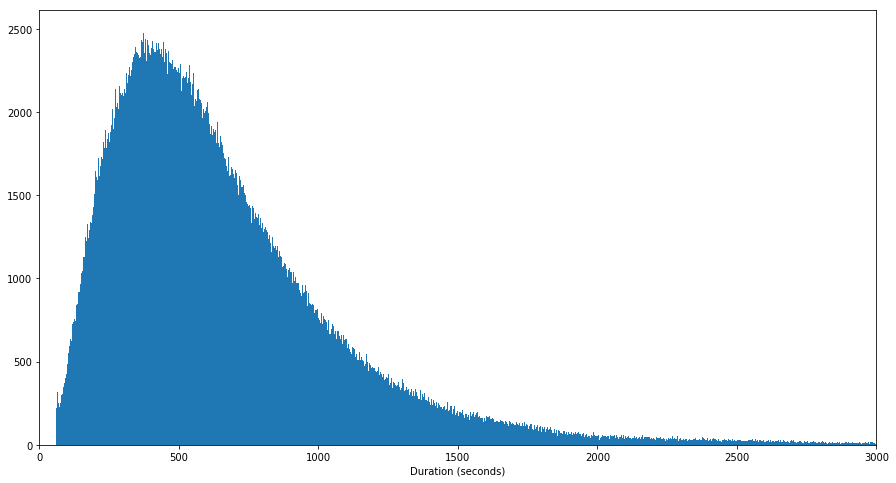

In [13]:
binsize = 1
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim([0,3000])
plt.xlabel('Duration (seconds)')
plt.show()

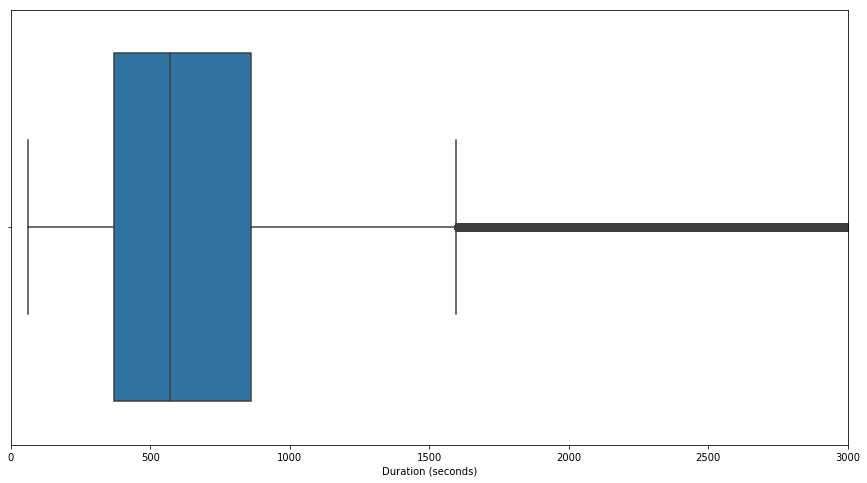

In [14]:
plt.figure(figsize = [15,8])
sb.boxplot(data = df, x = 'duration_sec')
plt.xlim([0,3000])
plt.xlabel('Duration (seconds)');

As a result, the most common duration is around 450-500 seconds, but due to some outliers (over 3000 seconds) the average duration raised to 792 seconds (`describe`'s results). Later we will find-out it with other variables which can have strong relationship.

Next up, let's check about the genders.

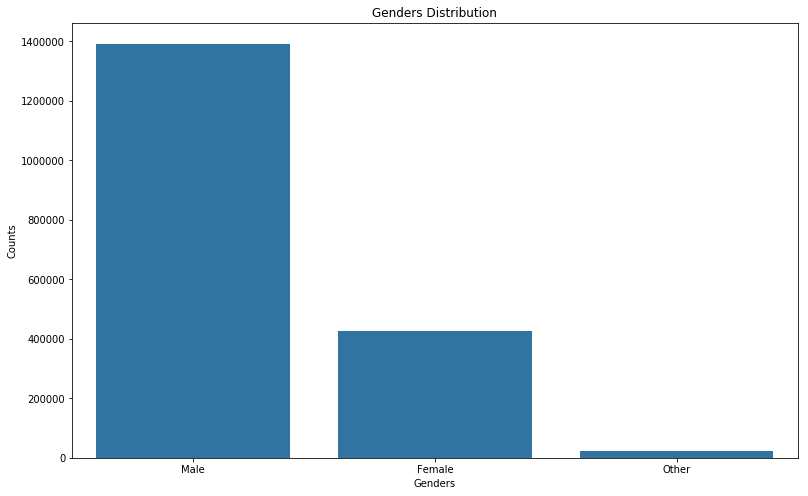

In [15]:
default_color = sb.color_palette()[0]
plt.figure(figsize = [13,8])
sb.countplot(data = df, x = 'member_gender', color = default_color);
plt.xlabel('Genders')
plt.ylabel('Counts')
plt.title('Genders Distribution');

In [16]:
df_males = df[df['member_gender'] == 'Male']
df_females = df[df['member_gender'] == 'Female']

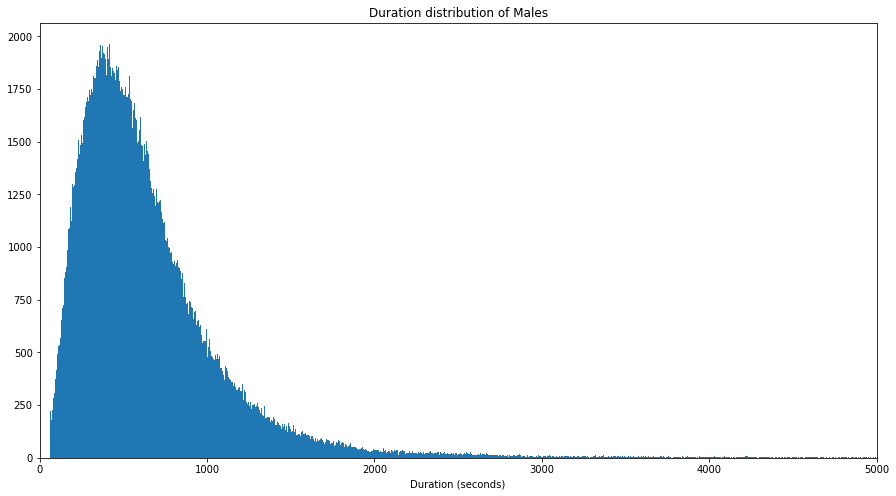

In [17]:
# Let's check the distribution of duration in Male and Female
binsize = 1
bins = np.arange(0, df_males['duration_sec'].max()+binsize, binsize)

plt.figure(figsize = [15,8])
plt.hist(data = df_males, x = 'duration_sec', bins = bins)
plt.xlim([0,5000])
plt.xlabel('Duration (seconds)')
plt.title('Duration distribution of Males')
plt.show();

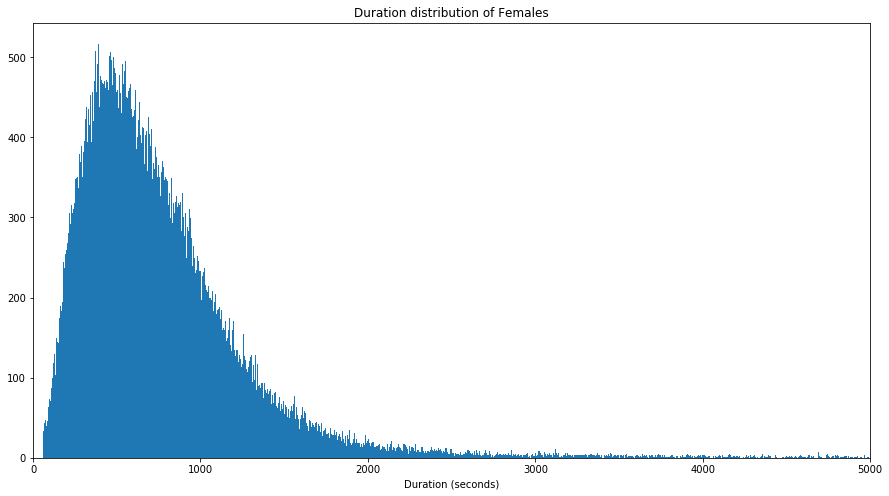

In [18]:
binsize = 1
bins = np.arange(0, df_females['duration_sec'].max()+binsize, binsize)

plt.figure(figsize = [15,8])
plt.hist(data = df_females, x = 'duration_sec', bins = bins)
plt.xlim([0,5000])
plt.xlabel('Duration (seconds)')
plt.title('Duration distribution of Females')
plt.show();

We can see most of members are Males, but both Males and Females look like have the same distribution trend in durations. 

Let' check out the distribution of ages, which one will have higher counts?

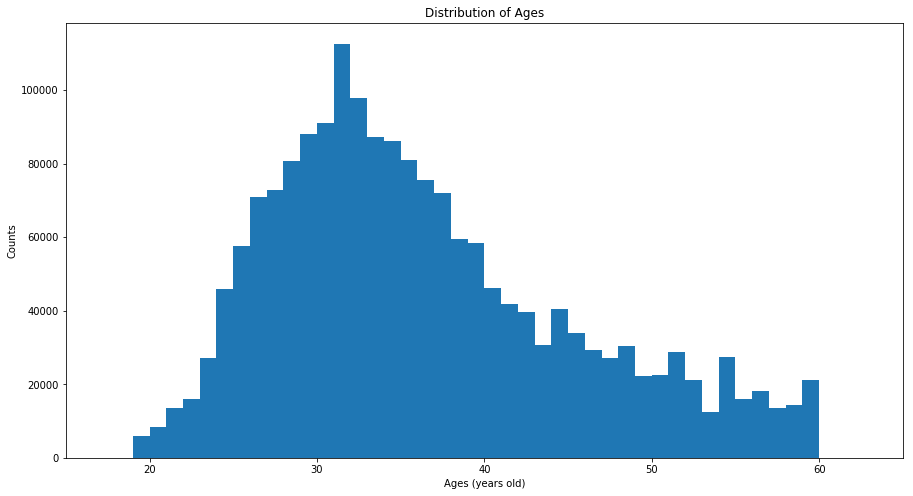

In [19]:
bin_edges = np.arange(0, df['users_age'].max()+1, 1)
plt.figure(figsize = [15,8])
plt.hist(data = df, x = 'users_age', bins = bin_edges);
plt.xlim(15,65)
plt.xlabel('Ages (years old)')
plt.ylabel('Counts')
plt.title('Distribution of Ages');

In the case of Ages, statistics show the popular ages is around 33-36 years old.

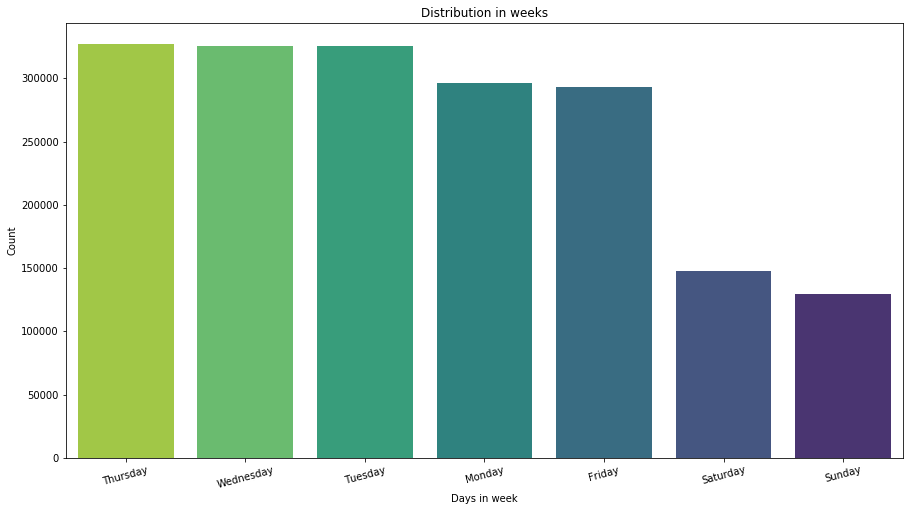

In [20]:
#Create columns of weekday and time in hour of trips taken
df['start_time']=pd.to_datetime(df['start_time'])
df['start_time_weekday'] = df['start_time'].dt.weekday_name
df['start_time_hour'] = df['start_time'].dt.hour

#Set order of values
days_count = df.start_time_weekday.value_counts()
days_order = days_count.index
#Plot distribution of weekday.
plt.figure(figsize =[15,8])
sb.countplot(data= df, x = 'start_time_weekday', palette = 'viridis_r', order = days_order);
plt.title('Distribution in weeks')
plt.xlabel('Days in week')
plt.xticks(rotation = 15)
plt.ylabel('Count');

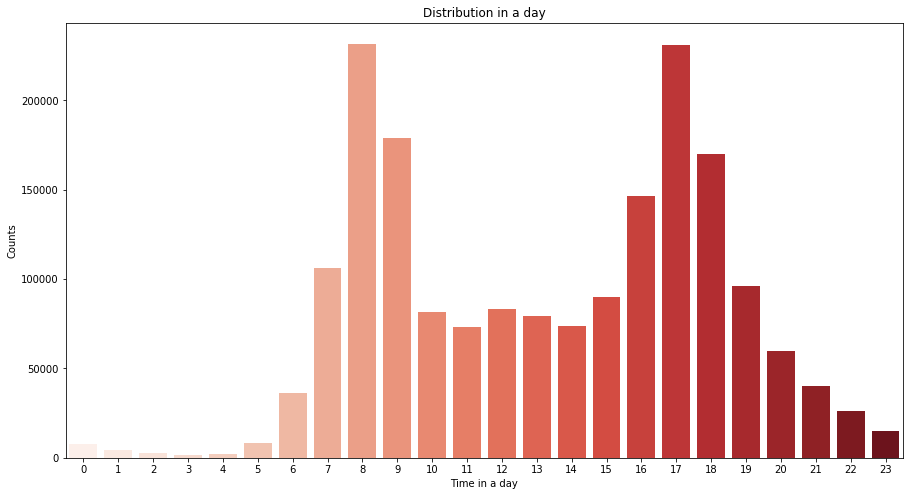

In [21]:
plt.figure(figsize=[15,8])
sb.countplot(data = df, x = 'start_time_hour', palette = 'Reds');
plt.title('Distribution in a day')
plt.xlabel('Time in a day')
plt.ylabel('Counts');

We can accounce that most of trip taken on weekdays with highest count on Thursday and less on weekend. Besides, at 8 am and 5 pm are the crowded time of users.

So are these users all members?

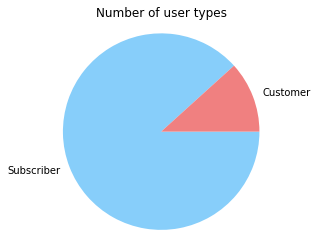

In [22]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 0, counterclock = False, colors = ['lightskyblue', 'lightcoral']);
plt.axis('square')
plt.title('Number of user types');

In [23]:
#Calculate the distance of every single trip in dataframe
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d
df['distance_estimates'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

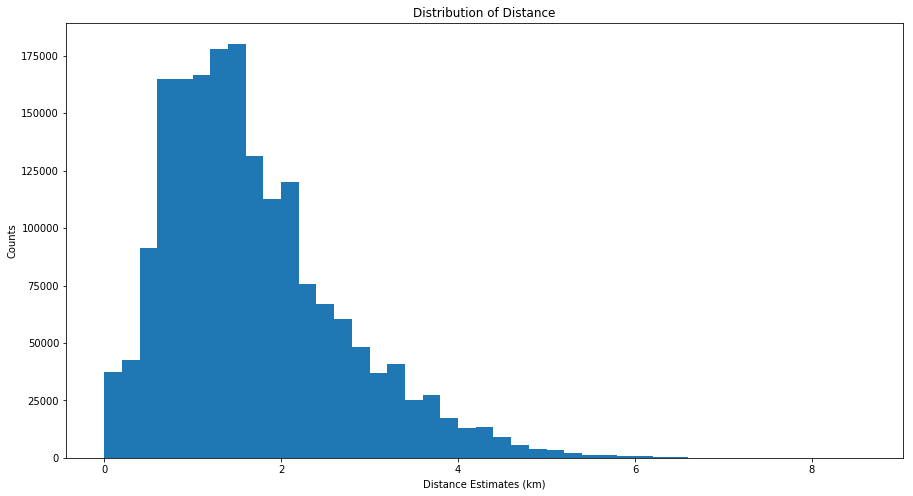

In [24]:
bin_edges = np.arange(0, df['distance_estimates'].max()+0.2, 0.2)
plt.figure(figsize = [15,8])
plt.hist(data = df, x = 'distance_estimates', bins = bin_edges);
plt.xlabel('Distance Estimates (km)')
plt.ylabel('Counts')
plt.title('Distribution of Distance');

In [25]:
df.distance_estimates.describe()

count    1.844898e+06
mean     1.681926e+00
std      9.978780e-01
min      0.000000e+00
25%      9.561712e-01
50%      1.478129e+00
75%      2.177944e+00
max      8.443297e+00
Name: distance_estimates, dtype: float64

Based on statistics, the Subcribers are so crowder than Customers and the average distance of users is around 1.7 kilometers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Number of Males are more than Females so many and their trend in duration of trip are also similar. Number of Customers and Subcribers are extremely different but the quality of trips are similar of different? The time they take the trip are frequently on weekdays, but are the time in a day and time in a week have relationship? We will find out later.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Due to member ages more than 60 years old are small and ages from 18 to 60 takes most of the users (95%). With this outliers can make the statistics go wrong. So we tidy the data with popular ages only.
I generated new variables such as time of users taken trip, age groups, distance estimates, etc. in order to check-out easily and analyze the dataframe.
For best prediction later and have the specific analyses, I decided to focus on San Fancisco area by limiting with latitude and longitude.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [26]:
numeric_vars = ['duration_sec', 'users_age', 'start_time_hour', 'distance_estimates']
categoric_vars = ['member_gender', 'user_type', 'start_time_weekday']

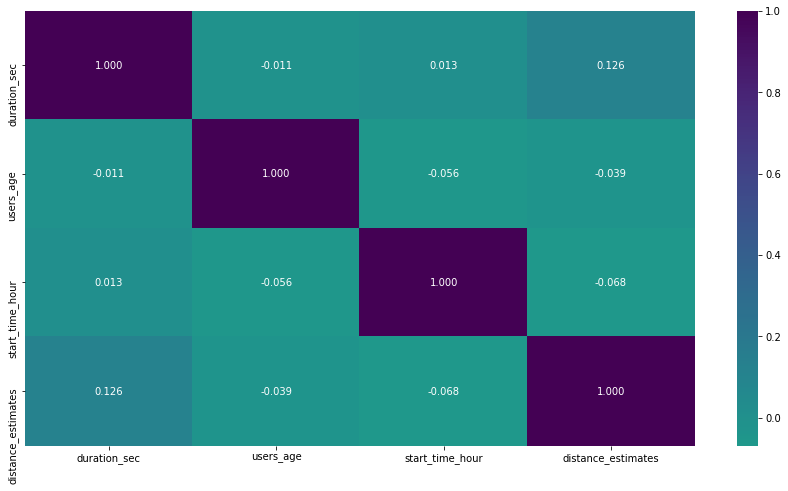

In [27]:
# correlation plot
plt.figure(figsize = [15, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0)
plt.show()

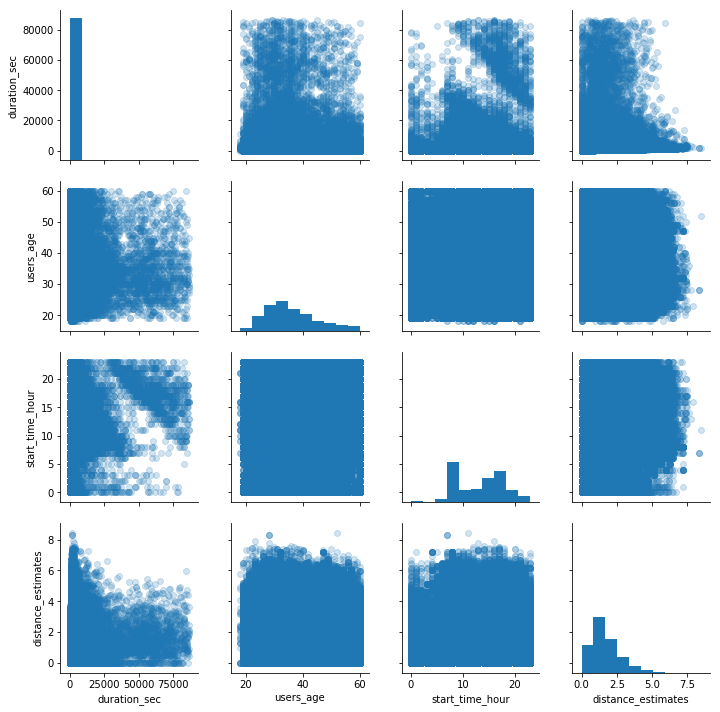

In [28]:
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter, alpha = 0.2);

We can see the correlation are not clear and they seem don't have relationship. But the correlation coefficient between duration and distance is higher than others. We will find out more later.

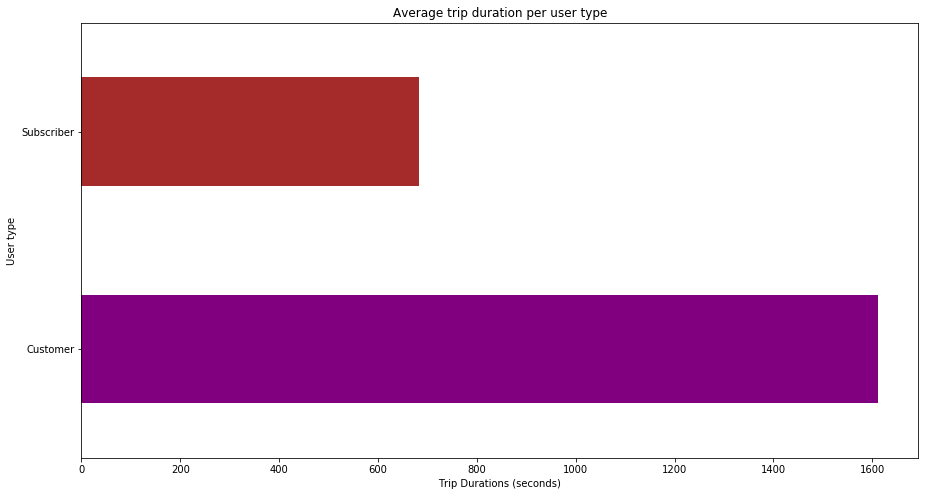

In [29]:
colors = ['purple', 'Brown']
ax = df.groupby('user_type')['duration_sec'].mean().plot(kind='barh', color = colors, figsize=(15,8))
ax.set_title('Average trip duration per user type')
ax.set_ylabel('User type')
ax.set_xlabel('Trip Durations (seconds)');

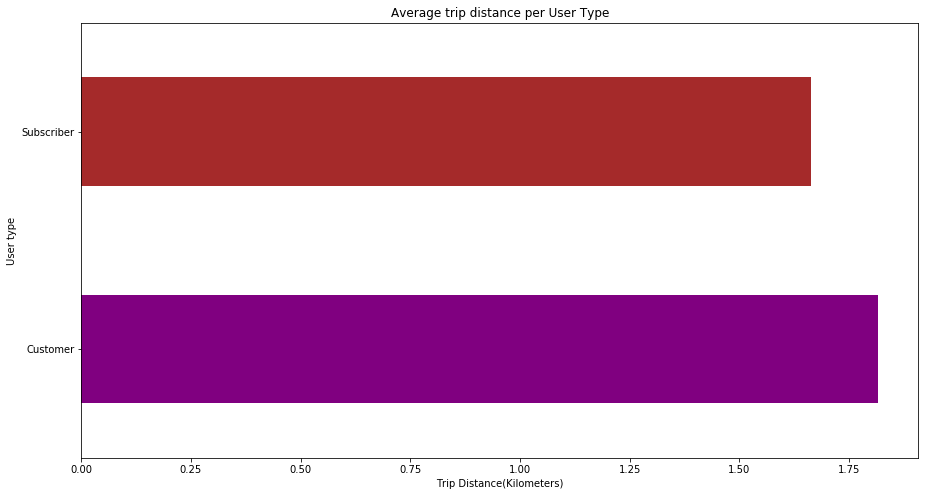

In [30]:
colors = ['purple', 'Brown']
ax = df.groupby('user_type')['distance_estimates'].mean().plot(kind='barh', color = colors, figsize=(15,8))
ax.set_title('Average trip distance per User Type')
ax.set_ylabel('User type')
ax.set_xlabel('Trip Distance(Kilometers)');

Interestingly, it appears that although number of customers is less than number of subcribers but the trip durations and distances of Customers are higher than Subcribers. That proves Customers are really interested and serious in this kind of sports.

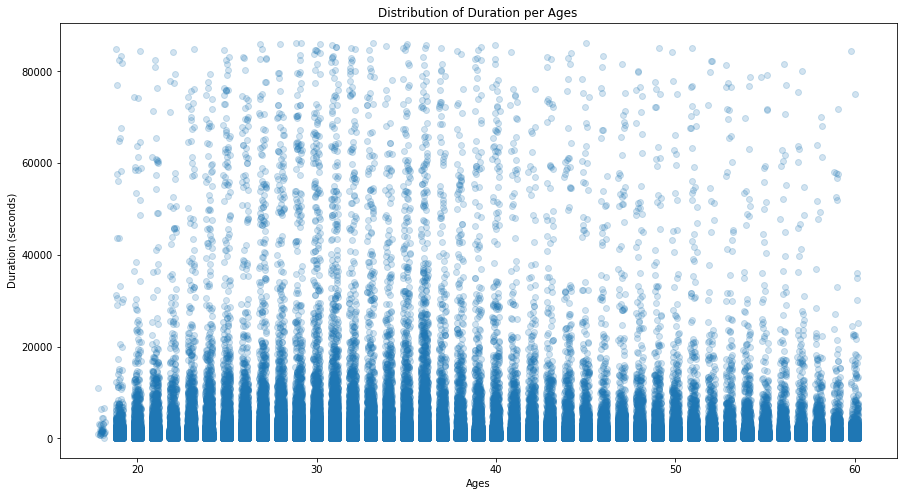

In [31]:
plt.figure(figsize = [15,8])
sb.regplot(data = df, x = 'users_age', y = 'duration_sec', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});
plt.title('Distribution of Duration per Ages')
plt.xlabel('Ages')
plt.ylabel('Duration (seconds)');

Due to high density in number users of Age from 25-40 years old, they have higher density of durations than the elderly. That leads to conclusion that most of users are younger (from 25-40 years-old) and they have longer trips than others.

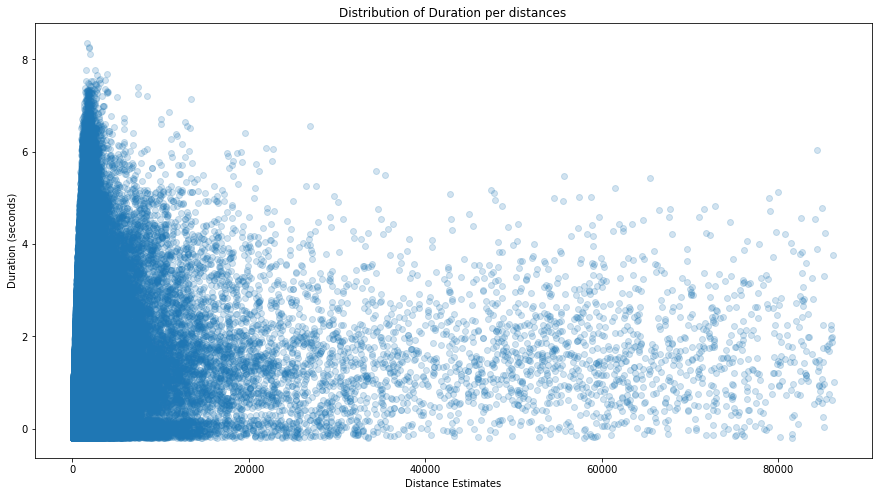

In [32]:
plt.figure(figsize = [15,8])
sb.regplot(data = df, x = 'duration_sec', y = 'distance_estimates', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});
plt.title('Distribution of Duration per distances')
plt.xlabel('Distance Estimates')
plt.ylabel('Duration (seconds)');

With this pair of variables, we can see they don't have clearly relationship but we can see it is positive. And with correlation coefficient which computes early,  we can conclude that they have slightly positive  relationship.

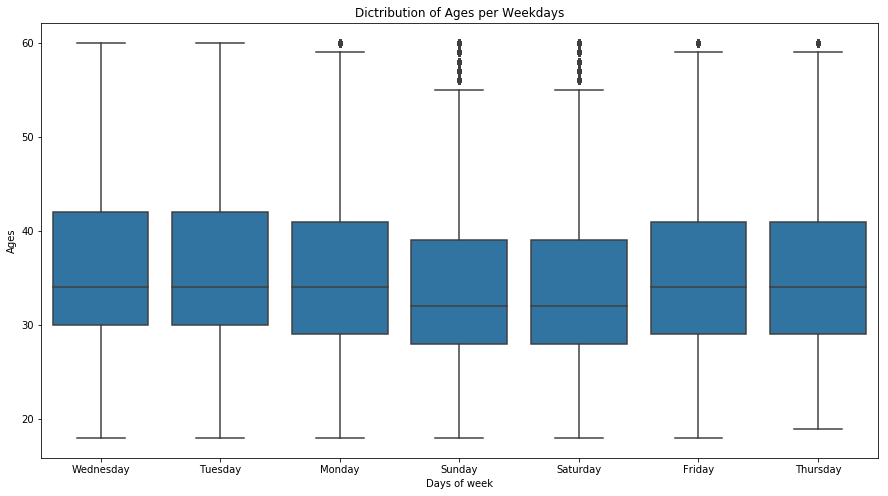

In [33]:
plt.figure(figsize=[15,8])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'start_time_weekday', y = 'users_age', color = base_color)
plt.title('Dictribution of Ages per Weekdays')
plt.xlabel('Days of week')
plt.ylabel('Ages');

Statistics show that the olders usually take trip on weekdays. And in contrast, for some reasons (works), the youngers often go on weekends.

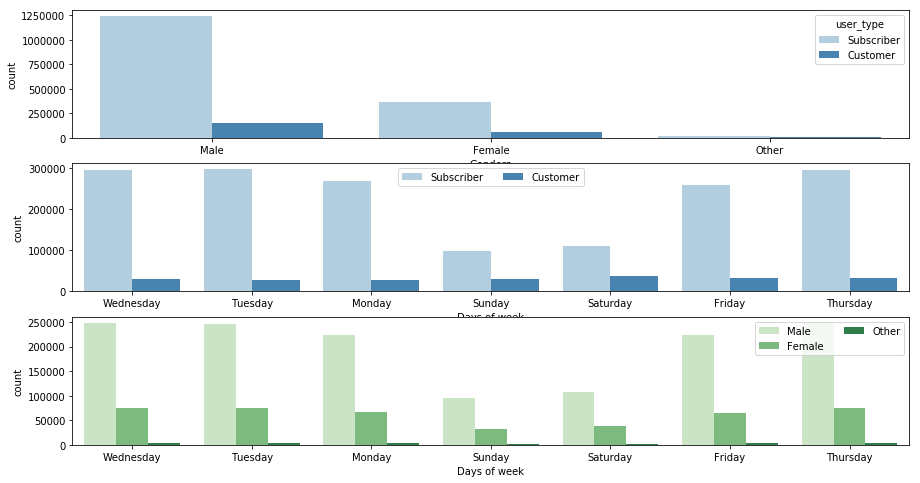

In [34]:
plt.figure(figsize = [15, 8])

# subplot 1: 'member_gender' vs 'user_type'
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')
plt.xlabel('Genders')

# subplot 2: 'user_type' vs 'start_time_weekday'
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2)
plt.xlabel('Days of week')

# subplot 3: 'start_time_weekday' vs 'member_gender'
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_time_weekday', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 
plt.xlabel('Days of week')
plt.show();

There is an amazing thing that the early results show that average durations of Customers are higher than Subcribers. But in this cases, charts showed the number of Customers are less than Subcribers. This can conclude the quality of Subcribers Trips are not good as Customers. And the last charts demonstrate number of users on weekends will less than weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration and Distance have slightly positive relation and the quality of Customer Trips are better Subcribers ones(longer duration and longer distance) although their quantity fewer. The amount of users in both types of user and all genders on weekdays are higher than weekends which mean people tend to take weekday trips

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In this dataset, statistics expected that the other variables (User ages,  duration, distance) will have strong  relationships but it seems unclearly. The number maybe interact due to some reasons, maybe the time and categoric variables.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical (genders, types of users, weekdays) play into the relationship between duration and distance.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


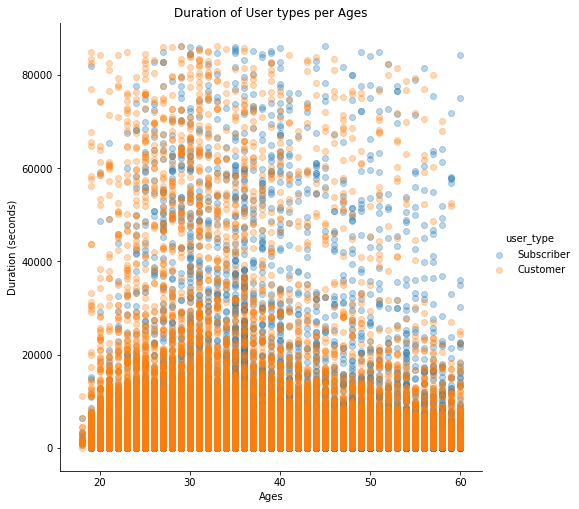

In [35]:
g = sb.FacetGrid(data = df, hue = 'user_type', size = 7)
g.map(plt.scatter, 'users_age', 'duration_sec', alpha = 0.3)
plt.xlabel('Ages')
plt.ylabel('Duration (seconds)')
plt.title('Duration of User types per Ages')
g.add_legend();

Based on this, not only can we admit the high density in number users of Age from 25-40 years old, they have higher density of durations than the elderly, but we can conclude most of Customer are younger than most of Subcribers.

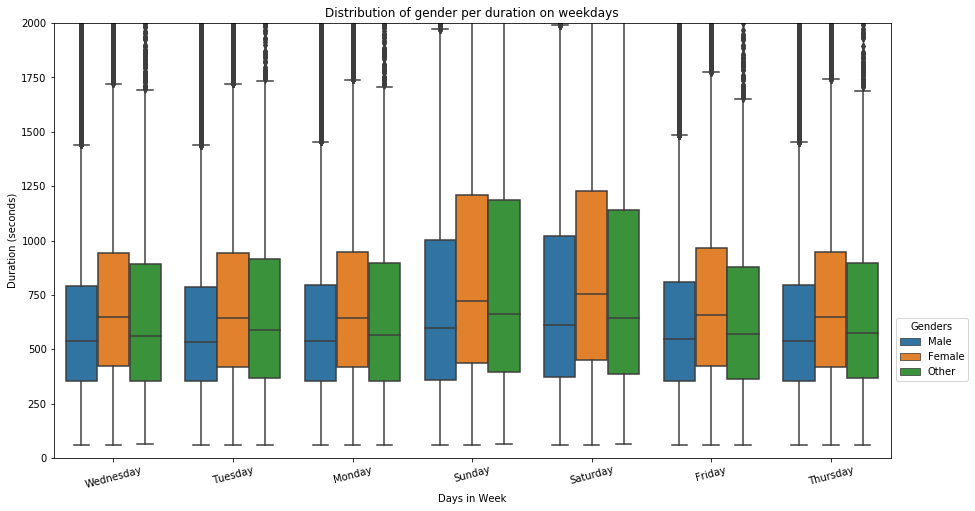

In [36]:
plt.figure(figsize = [15,8])
sb.boxplot(data = df, x = 'start_time_weekday', y = 'duration_sec', hue = 'member_gender');
plt.xticks(rotation = 15);
plt.ylim(0,2000)
plt.title('Distribution of gender per duration on weekdays')
plt.xlabel('Days in Week')
plt.ylabel('Duration (seconds)')
plt.legend(title = 'Genders',loc = 6, bbox_to_anchor = (1, 0.25));

On weekend, bikers usually take long trips and duration of most of Male all the week are shorter. Although number of Males are higher than number of Females but duration in trips of Females usually higher than Males.

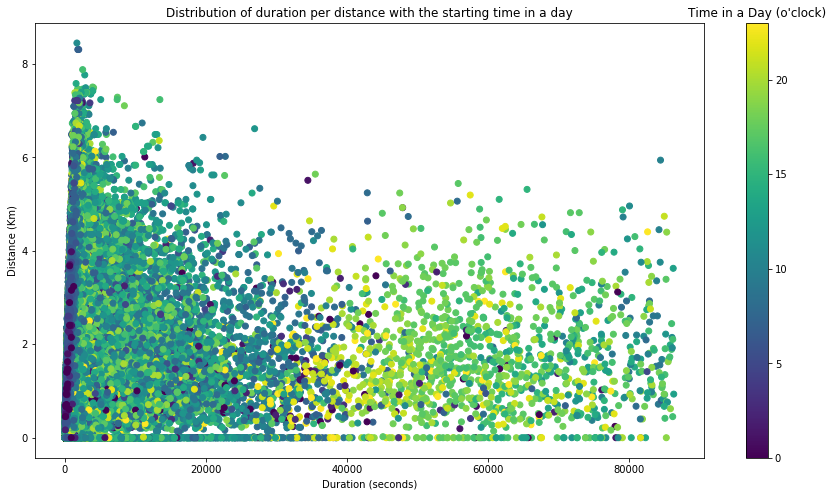

In [37]:
plt.figure(figsize = [15,8])
plt.scatter(data = df, x = 'duration_sec', y = 'distance_estimates', c = 'start_time_hour')
plt.title('Distribution of duration per distance with the starting time in a day')
plt.xlabel('Duration (seconds)')
plt.ylabel('Distance (Km)')
clb = plt.colorbar()
clb.ax.set_title("Time in a Day (o'clock)");

We can see that most of long duration will be taken in the evening (from 17h to midnight) and short duration will be taken in the morning (from 6h-10h).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

After all, statistics prove the duration have a slight relationship with distance. And duration of Females and Customer type are higher than Males and Subcribers. People usually take bike trip in the morning and in the evening and on weekdays. And Customers will take trip with higher quality (higher duration, higher distance) especially at ages range from 25 to 40 years old.

### Were there any interesting or surprising interactions between features?

At the begining, people easily think that females will take trip shorter duration and distance, but based on this analyze, this is wrong. In addition, at weekend we will have  more time to take trip, but after all, we can witness that people usually biking on weekdays.